In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
from qiskit.providers.fake_provider import *
import numpy as np 
import os

In [2]:
all_fakes=[FakeAlmadenV2,FakeArmonkV2,FakeAthensV2,FakeAuckland,FakeBelemV2,FakeBoeblingenV2,FakeBogotaV2,FakeBrooklynV2,FakeBurlingtonV2,FakeCairoV2,FakeCambridgeV2,FakeCasablancaV2,FakeEssexV2,FakeGeneva,FakeGuadalupeV2,FakeHanoiV2,FakeJakartaV2,FakeJohannesburgV2,FakeKolkataV2,FakeLagosV2,FakeLimaV2,FakeLondonV2,FakeManhattanV2,FakeManilaV2,FakeMelbourneV2,FakeMontrealV2,FakeMumbaiV2,FakeNairobiV2,FakeOslo,FakeOurenseV2,FakeParisV2,FakePerth,FakePrague,FakePoughkeepsieV2,FakeQuitoV2,FakeRochesterV2,FakeRomeV2,FakeSantiagoV2,FakeSherbrooke,FakeSingaporeV2,FakeSydneyV2,FakeTorontoV2,FakeValenciaV2,FakeVigoV2,FakeWashingtonV2,FakeYorktownV2]
import random; selected_fakes = random.sample(all_fakes, 5)
selected_fakes  # having any randomly selected 5 fake backends out of 46 mentioned in the inital list

[qiskit.providers.fake_provider.backends.hanoi.fake_hanoi.FakeHanoiV2,
 qiskit.providers.fake_provider.backends.toronto.fake_toronto.FakeTorontoV2,
 qiskit.providers.fake_provider.backends.manila.fake_manila.FakeManilaV2,
 qiskit.providers.fake_provider.backends.boeblingen.fake_boeblingen.FakeBoeblingenV2,
 qiskit.providers.fake_provider.backends.washington.fake_washington.FakeWashingtonV2]

In [3]:
benchmarks=[]
for i in range(3,17,2):
    label = "ghz"+str(i)
    benchmarks.append((supermarq.ghz.GHZ(i),label))
for i in benchmarks:
    circuit=i[0].qiskit_circuit()
    print("--------------------------",i[1],"---------------------------")
    print(circuit.draw())

-------------- ghz3 --------------
     ┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2 
-------------- ghz5 --------------
     ┌───┐          ┌─┐                      
q_0: ┤ H ├──■───────┤M├──────────────────────
     └───┘┌─┴─┐     └╥┘     ┌─┐              
q_1: ─────┤ X ├──■───╫──────┤M├──────────────
          └───┘┌─┴─┐ ║      └╥┘     ┌─┐      
q_2: ──────────┤ X ├─╫───■───╫──────┤M├──────
               └───┘ ║ ┌─┴─┐ ║      └╥┘┌─┐   
q_3: ────────────────╫─┤ X ├─╫───■───╫─┤M├───
                     ║ └───┘ ║ ┌─┴─┐ ║ └╥┘┌─┐
q_4: ────────────────╫───────╫─┤ X ├─╫──╫─┤M├
                     ║       ║ └───┘ ║  ║ └╥┘
c: 5/════════════════╩═══════╩═══════╩══╩══╩═
                     0       1       2  3  4 
-------------- ghz7 --------------
     ┌───┐          ┌─┐    

In [5]:
benchmark_features = {}
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'ghz5': [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], 'ghz7': [0.2857142857142857, 1.0, 0.8571428571428571, 0.35714285714285715, 0.0, 0], 'ghz9': [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], 'ghz11': [0.18181818181818182, 1.0, 0.9090909090909091, 0.24242424242424243, 0.0, 0], 'ghz13': [0.15384615384615385, 1.0, 0.9230769230769231, 0.2087912087912088, 0.0, 0], 'ghz15': [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0]}


In [6]:
jobs =[]
print("=============SCORES OF ALL THE CIRCUITS=============")    
for backend in selected_fakes:
    print("------------------------BACKEND-NAME :: ", backend().name)
    for benchmark, label in benchmarks:
        circuit=benchmark.qiskit_circuit()
        job = backend().run(circuit, shots=1000)
        result=job.result()
        counts = job.result(0).get_counts()
        score = benchmark.score(counts)
        print(label," :: ",score)
        #counts=job.result(0).count()
        jobs.append((label,benchmark,backend,job,score))
#jobs

=============SCORES OF ALL THE CIRCUITS=============
------------------------BACKEND-NAME ::  fake_hanoi
ghz3  ::  0.9578956044901644
ghz5  ::  0.9232678180840281
ghz7  ::  0.9039955751995808
ghz9  ::  0.8699816088066253
ghz11  ::  0.8209119881290019
ghz13  ::  0.7484919785236042
ghz15  ::  0.682999633967593
------------------------BACKEND-NAME ::  fake_toronto
ghz3  ::  0.7926565347182853
ghz5  ::  0.725396428553634
ghz7  ::  0.6629166559965853
ghz9  ::  0.6275427601506077
ghz11  ::  0.5341632034398386
ghz13  ::  0.5016596981255366
ghz15  ::  0.3874615343966959
------------------------BACKEND-NAME ::  fake_manila
ghz3  ::  0.8207994014166159
ghz5  ::  0.7488669116767448
ghz7  ::  0.7699947643620263
ghz9  ::  0.760580242484998
ghz11  ::  0.7677682543114344
ghz13  ::  0.748280974396471
ghz15  ::  0.7598716357254184
------------------------BACKEND-NAME ::  fake_boeblingen
ghz3  ::  0.8618499736749728
ghz5  ::  0.7888166663135444
ghz7  ::  0.7241363060260352
ghz9  ::  0.6279161203277698
g

In [7]:
all_scores={}  
all_fake_names=[]
all_fake_scores=[]
for i in selected_fakes:
    fakes=i
    #print("SELCETED_FAKES:: ",i)
    i={}
    for label,benchmark,backend,job,score in jobs:
        #supermarq.plotting.plot_results([score], [label])
        if fakes == backend:
            i[label] = score
    device_scores = 'device_score_' +str(fakes().name)
    all_scores[device_scores]= i
    all_fake_scores.append(i)
    all_fake_names.append(device_scores)   
print(all_scores)    

{'device_score_fake_hanoi': {'ghz3': 0.9578956044901644, 'ghz5': 0.9232678180840281, 'ghz7': 0.9039955751995808, 'ghz9': 0.8699816088066253, 'ghz11': 0.8209119881290019, 'ghz13': 0.7484919785236042, 'ghz15': 0.682999633967593}, 'device_score_fake_toronto': {'ghz3': 0.7926565347182853, 'ghz5': 0.725396428553634, 'ghz7': 0.6629166559965853, 'ghz9': 0.6275427601506077, 'ghz11': 0.5341632034398386, 'ghz13': 0.5016596981255366, 'ghz15': 0.3874615343966959}, 'device_score_fake_manila': {'ghz3': 0.8207994014166159, 'ghz5': 0.7488669116767448, 'ghz7': 0.7699947643620263, 'ghz9': 0.760580242484998, 'ghz11': 0.7677682543114344, 'ghz13': 0.748280974396471, 'ghz15': 0.7598716357254184}, 'device_score_fake_boeblingen': {'ghz3': 0.8618499736749728, 'ghz5': 0.7888166663135444, 'ghz7': 0.7241363060260352, 'ghz9': 0.6279161203277698, 'ghz11': 0.5203976836953569, 'ghz13': 0.47742671256239533, 'ghz15': 0.41535218990567585}, 'device_score_fake_washington': {'ghz3': 0.9517310164368095, 'ghz5': 0.7539151098

USED BACKEND:: fake_hanoi ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9578956044901644


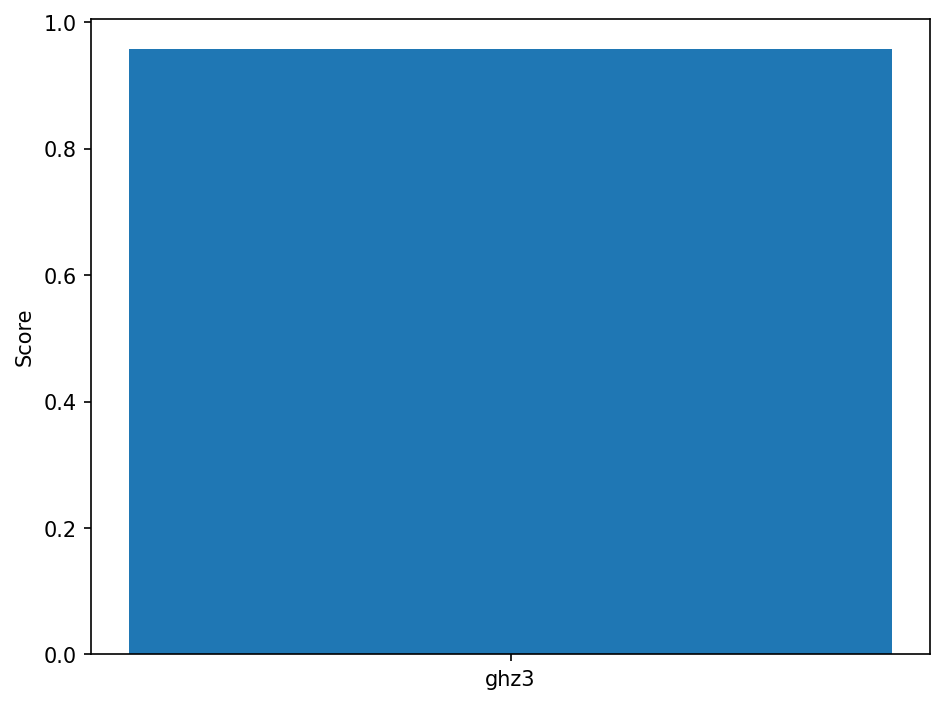

-----------------------------------------------------------
USED BACKEND:: fake_hanoi ; CIRCUIT_NAME: ghz5 ; SCORE = 0.9232678180840281


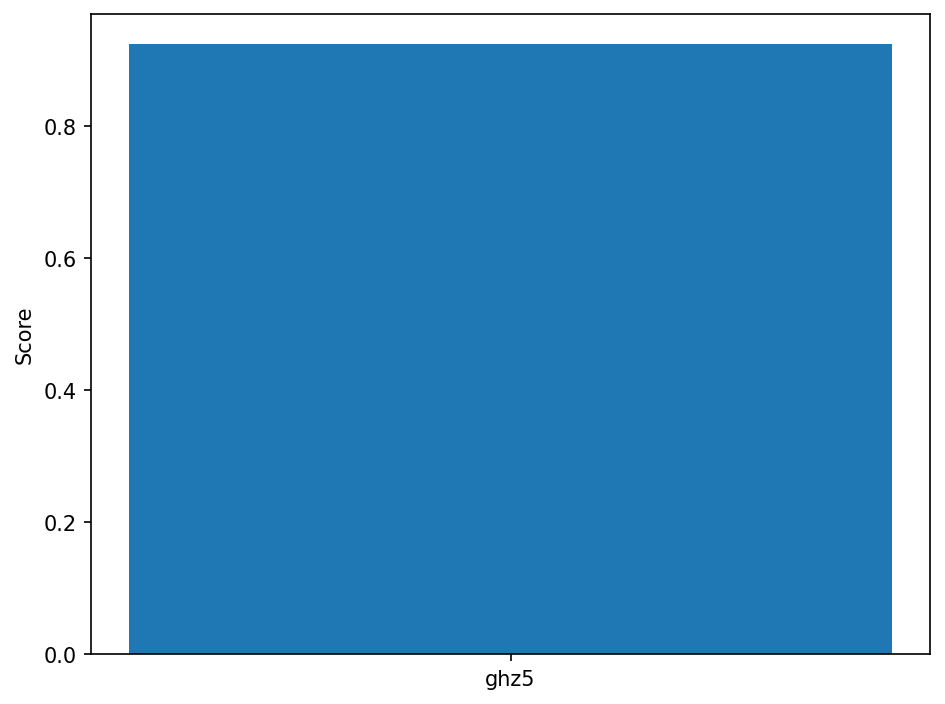

-----------------------------------------------------------
USED BACKEND:: fake_hanoi ; CIRCUIT_NAME: ghz7 ; SCORE = 0.9039955751995808


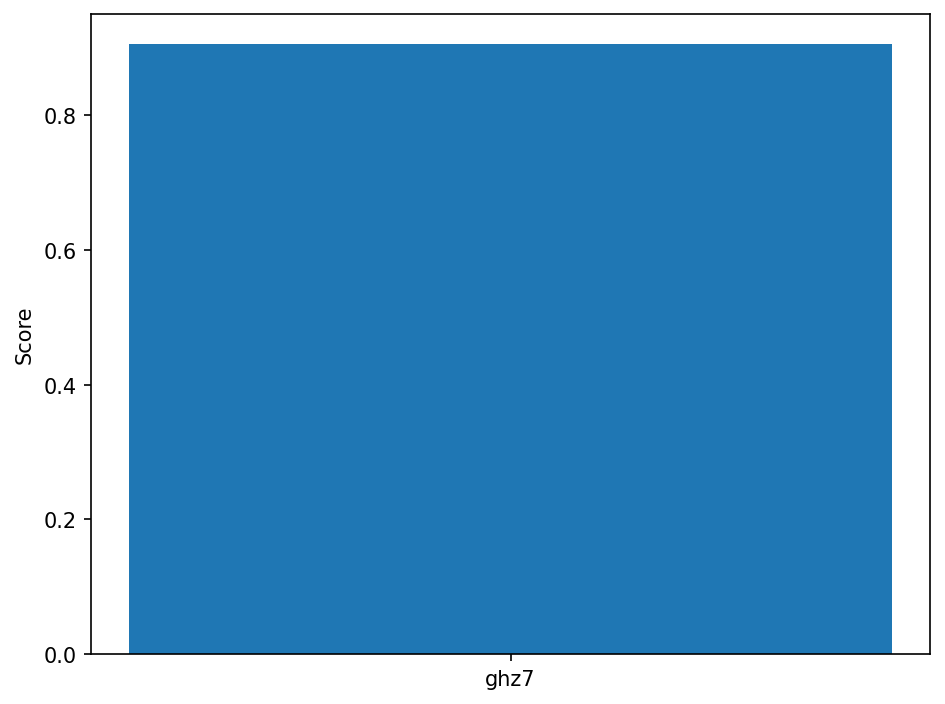

-----------------------------------------------------------
USED BACKEND:: fake_hanoi ; CIRCUIT_NAME: ghz9 ; SCORE = 0.8699816088066253


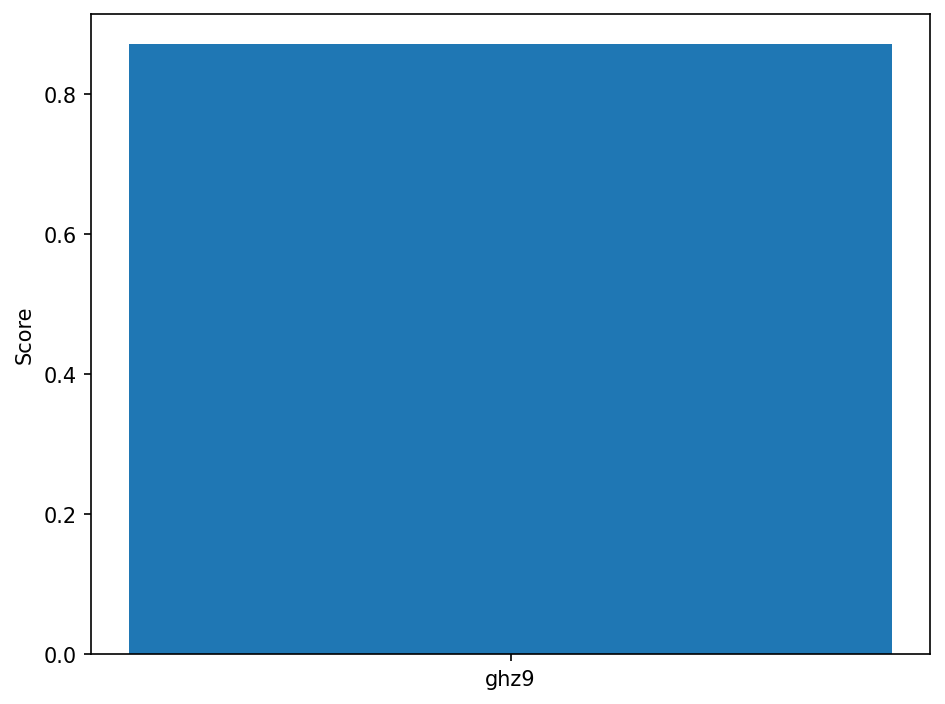

-----------------------------------------------------------
USED BACKEND:: fake_hanoi ; CIRCUIT_NAME: ghz11 ; SCORE = 0.8209119881290019


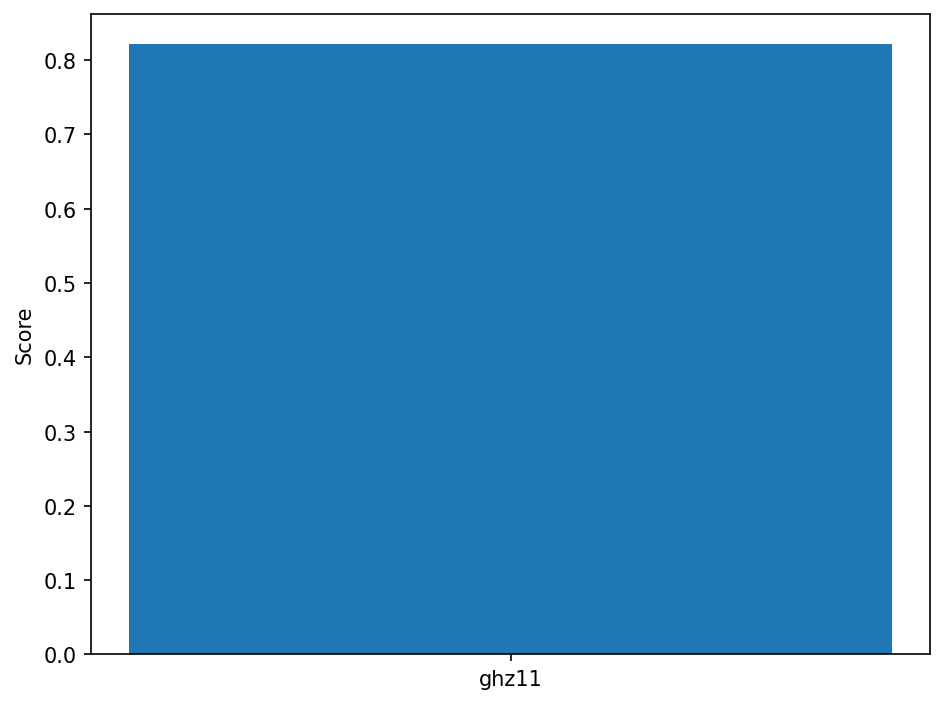

-----------------------------------------------------------
USED BACKEND:: fake_hanoi ; CIRCUIT_NAME: ghz13 ; SCORE = 0.7484919785236042


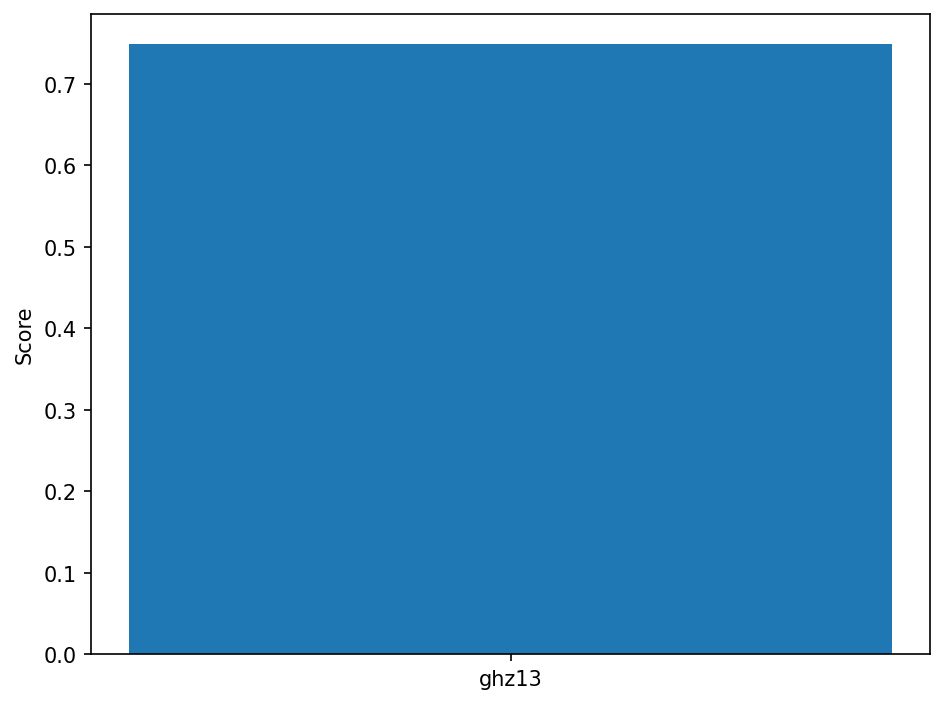

-----------------------------------------------------------
USED BACKEND:: fake_hanoi ; CIRCUIT_NAME: ghz15 ; SCORE = 0.682999633967593


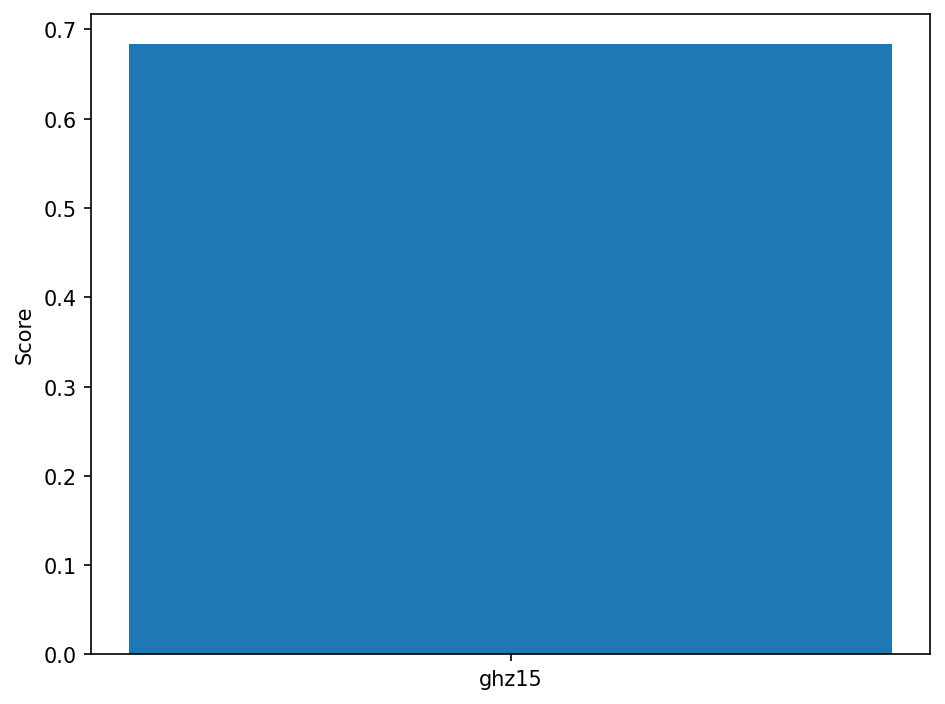

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: ghz3 ; SCORE = 0.7926565347182853


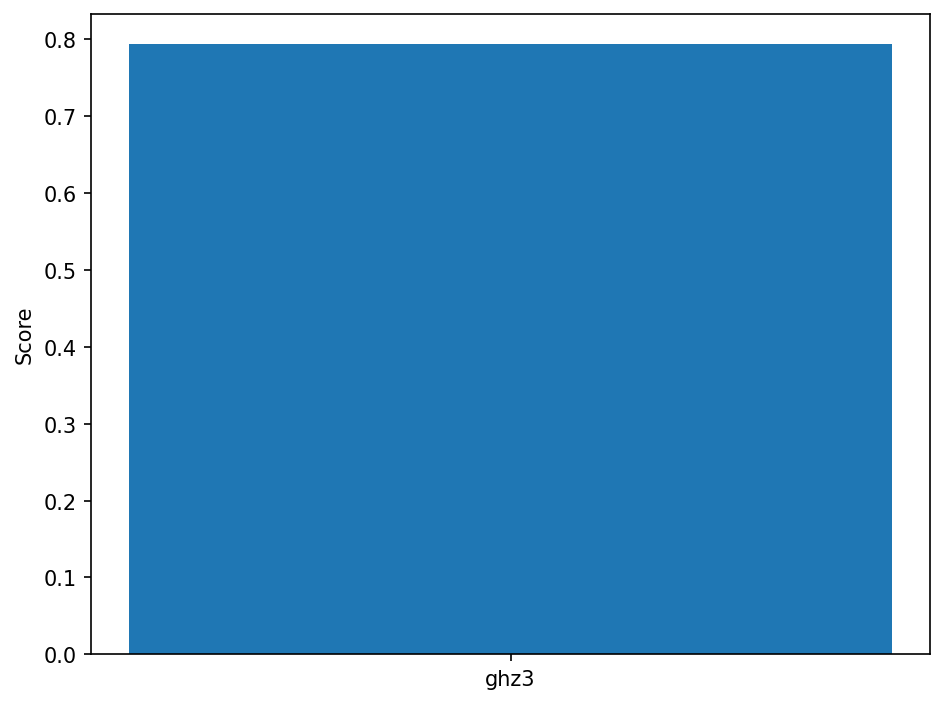

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: ghz5 ; SCORE = 0.725396428553634


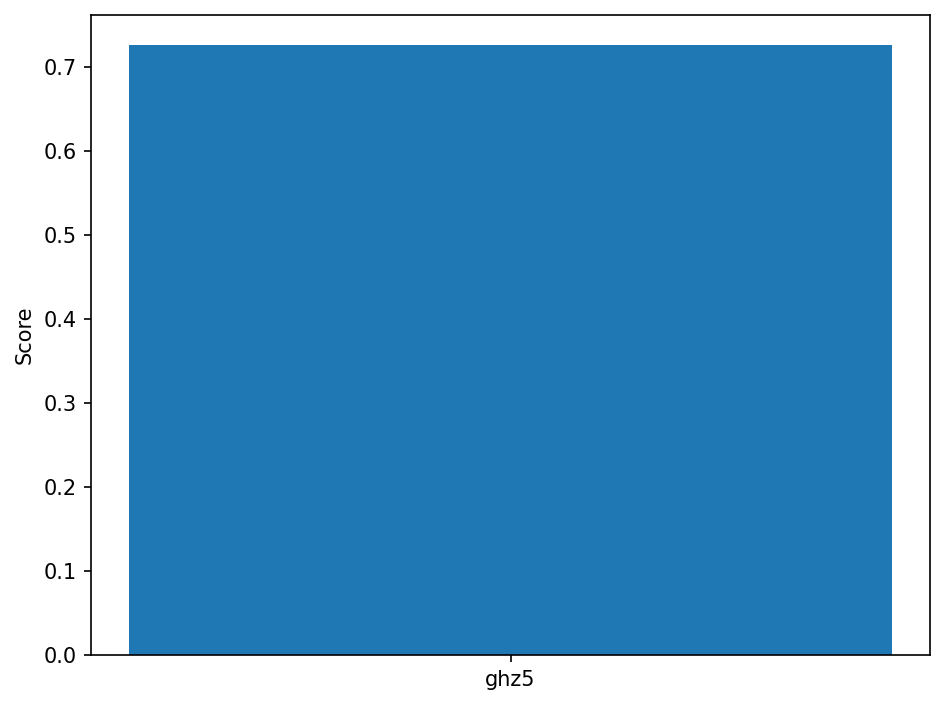

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: ghz7 ; SCORE = 0.6629166559965853


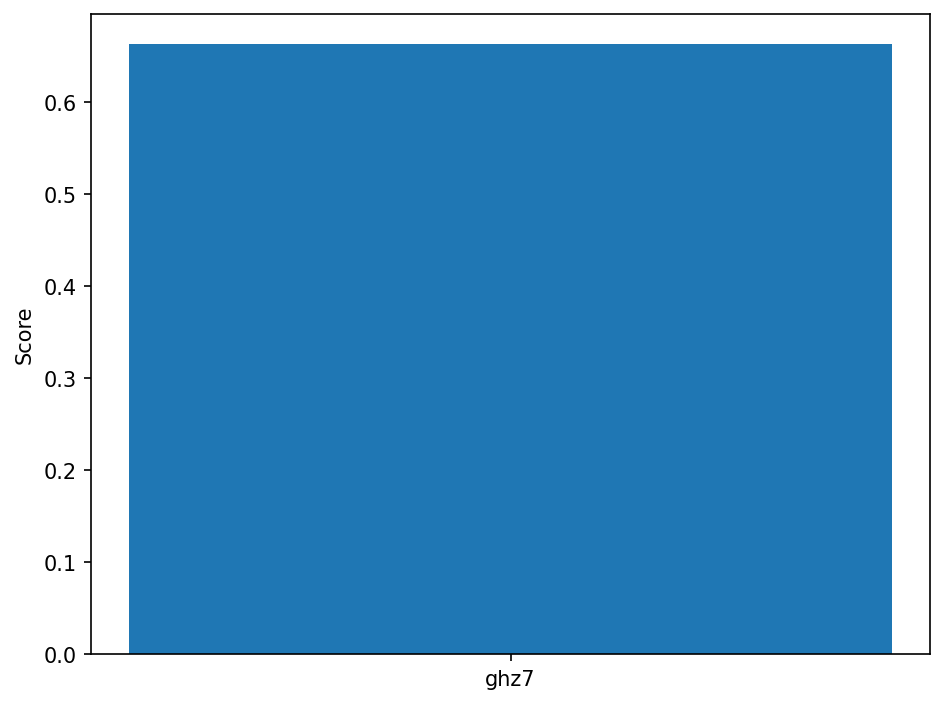

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: ghz9 ; SCORE = 0.6275427601506077


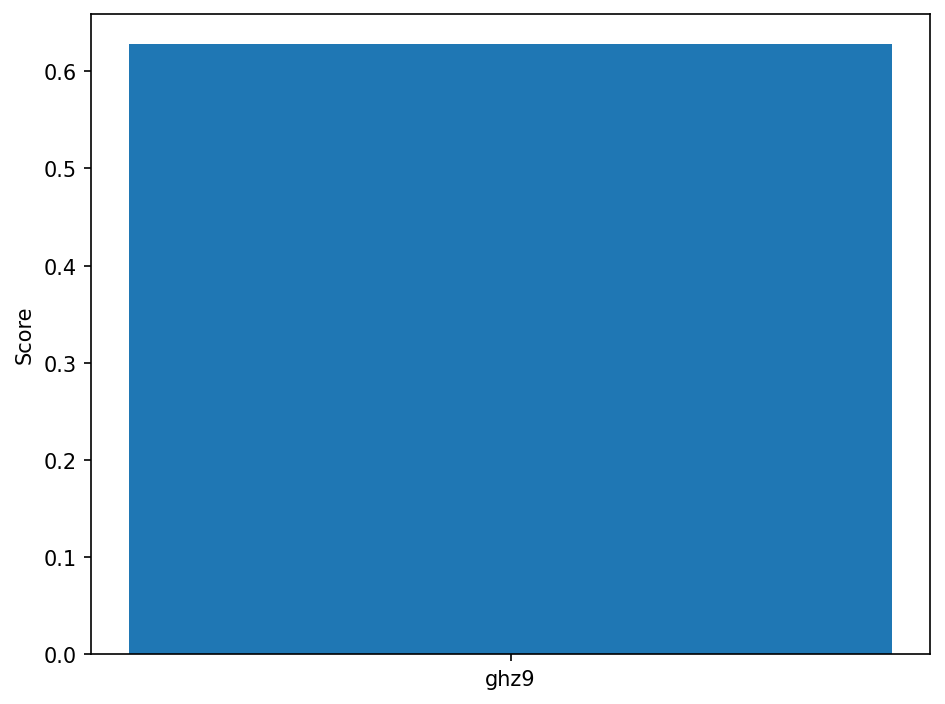

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: ghz11 ; SCORE = 0.5341632034398386


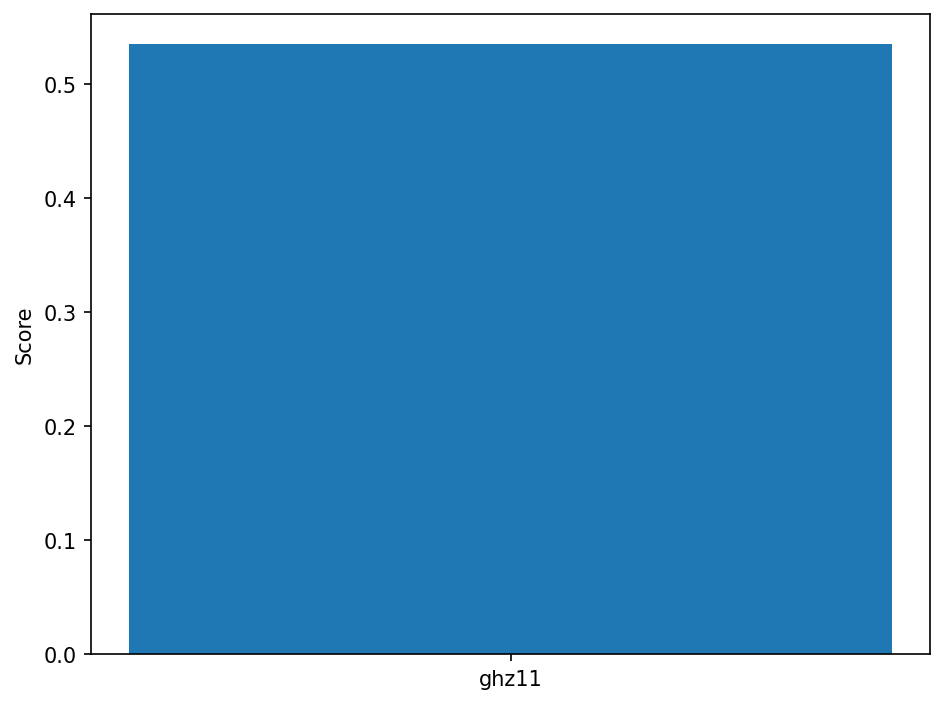

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: ghz13 ; SCORE = 0.5016596981255366


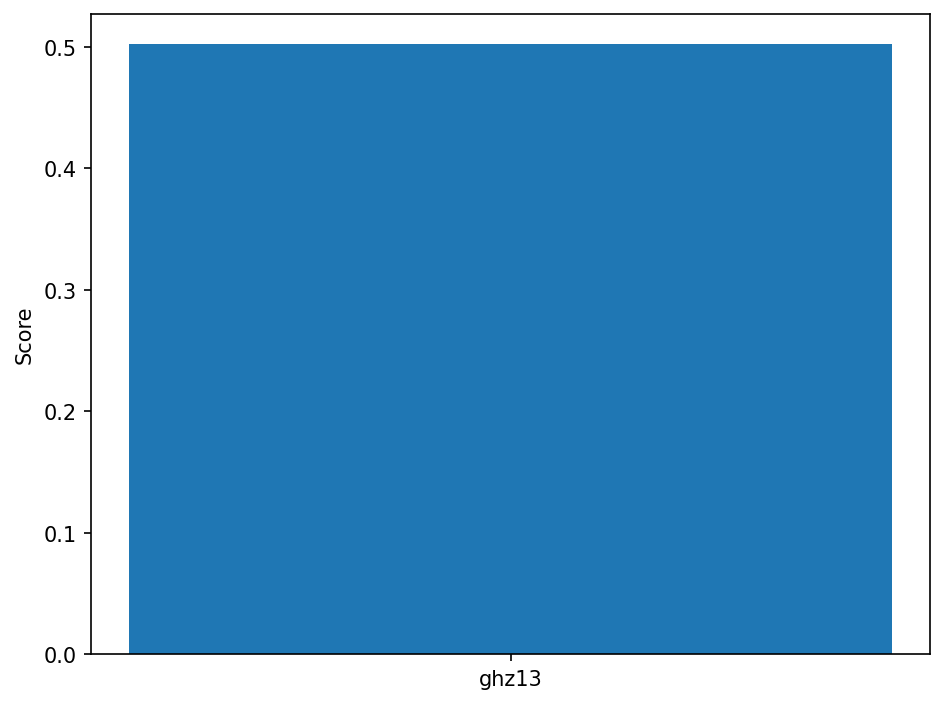

-----------------------------------------------------------
USED BACKEND:: fake_toronto ; CIRCUIT_NAME: ghz15 ; SCORE = 0.3874615343966959


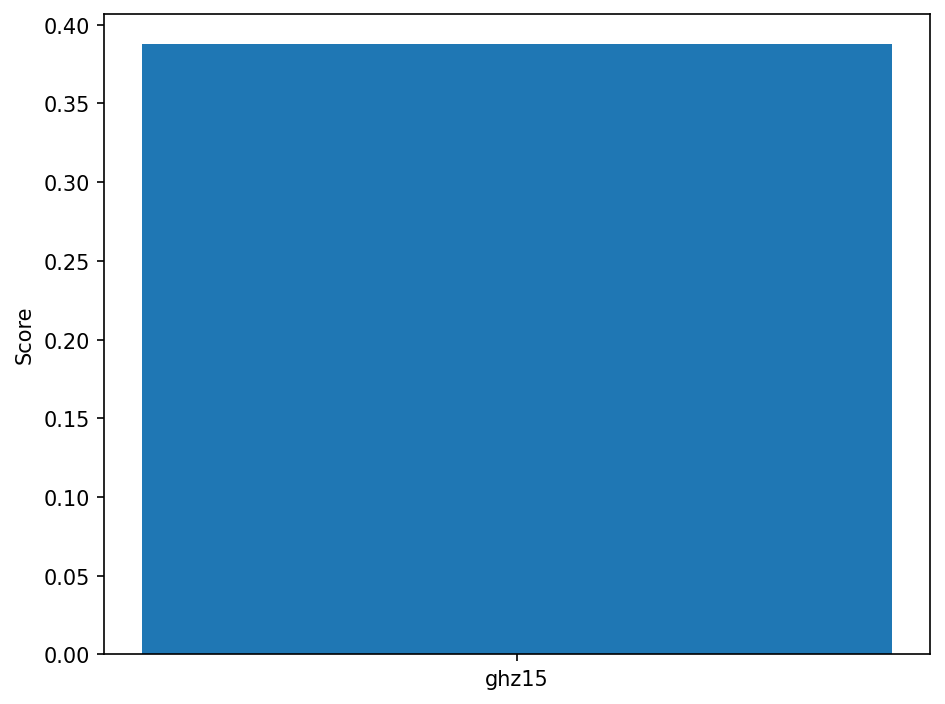

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8207994014166159


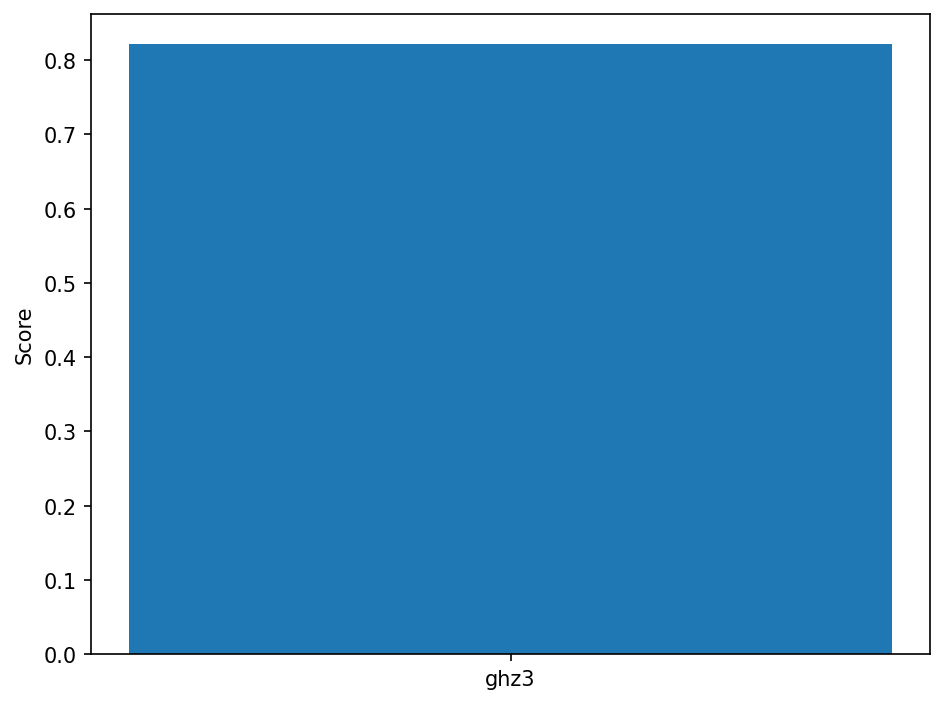

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: ghz5 ; SCORE = 0.7488669116767448


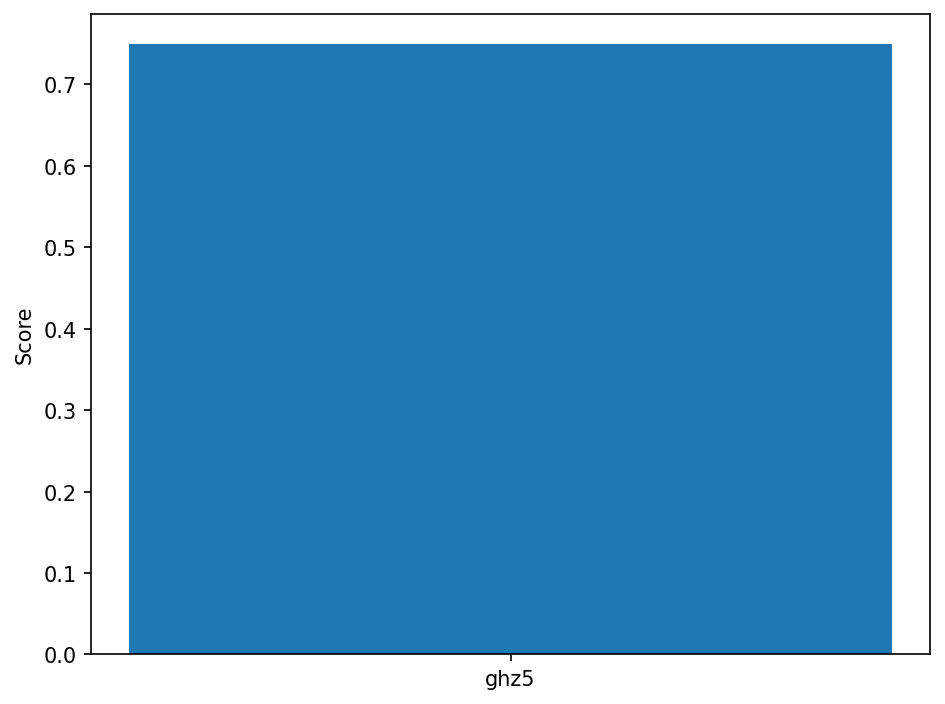

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: ghz7 ; SCORE = 0.7699947643620263


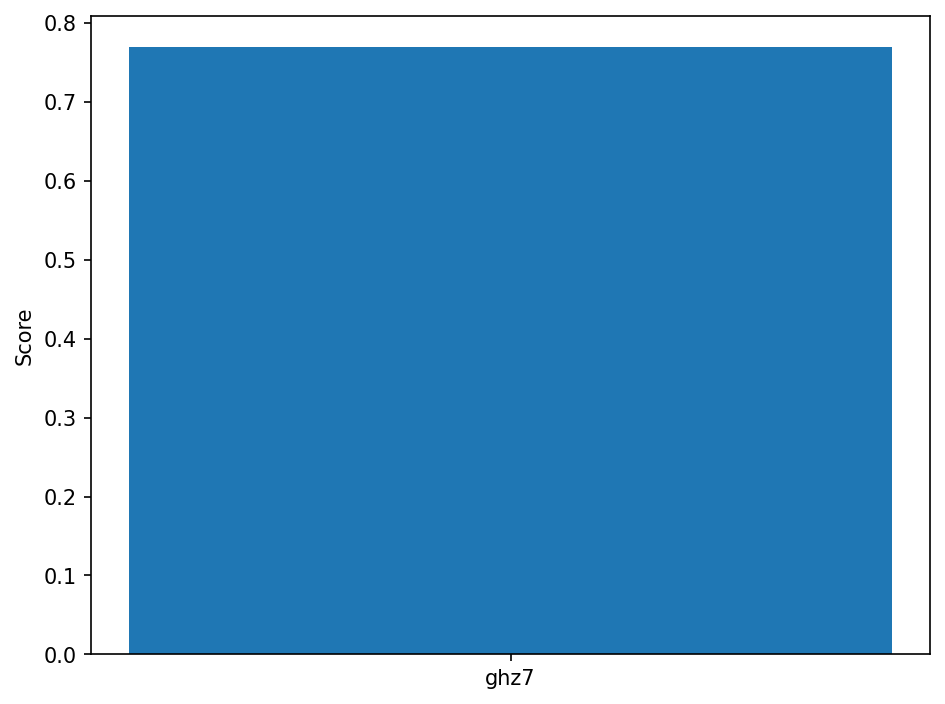

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: ghz9 ; SCORE = 0.760580242484998


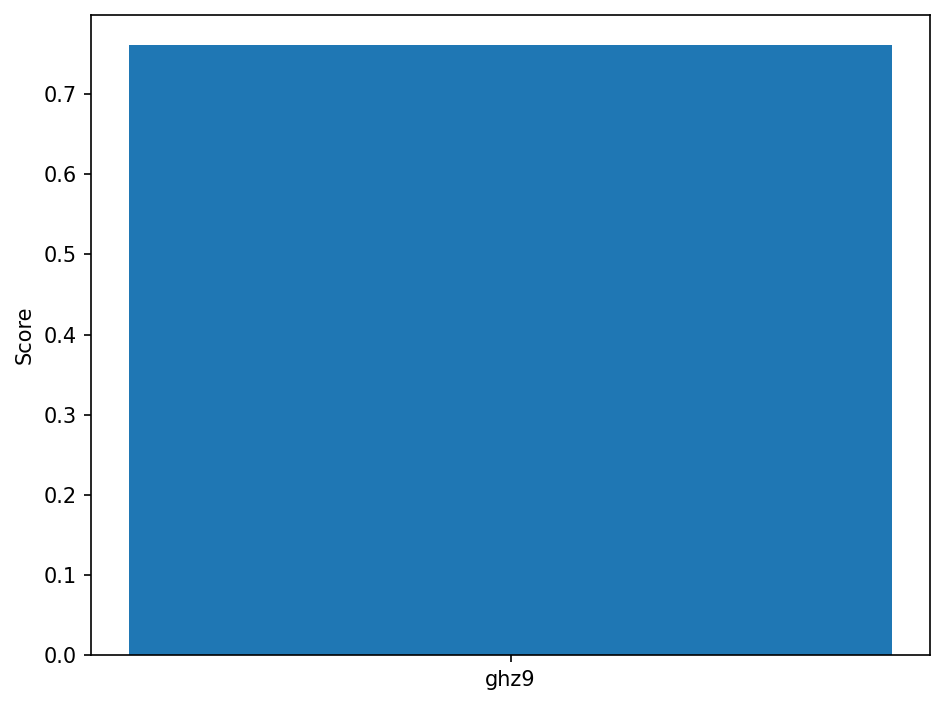

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: ghz11 ; SCORE = 0.7677682543114344


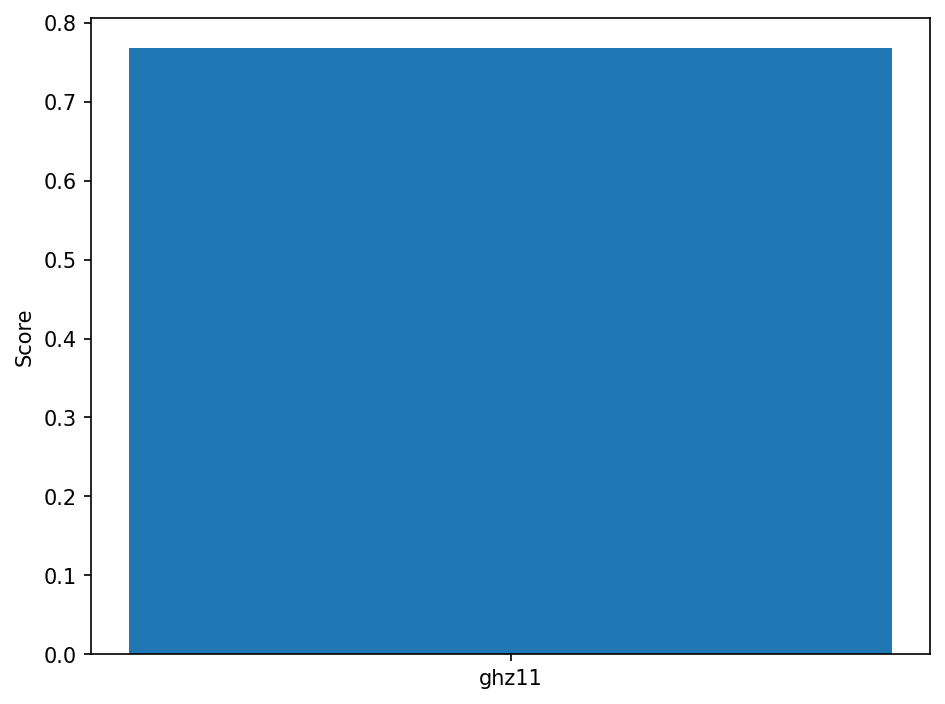

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: ghz13 ; SCORE = 0.748280974396471


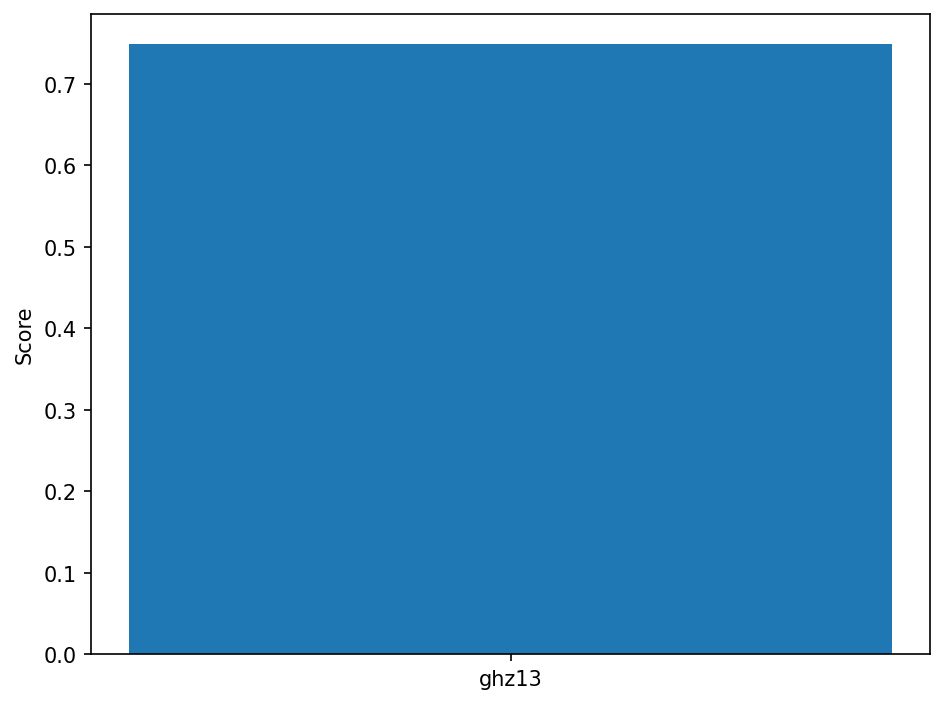

-----------------------------------------------------------
USED BACKEND:: fake_manila ; CIRCUIT_NAME: ghz15 ; SCORE = 0.7598716357254184


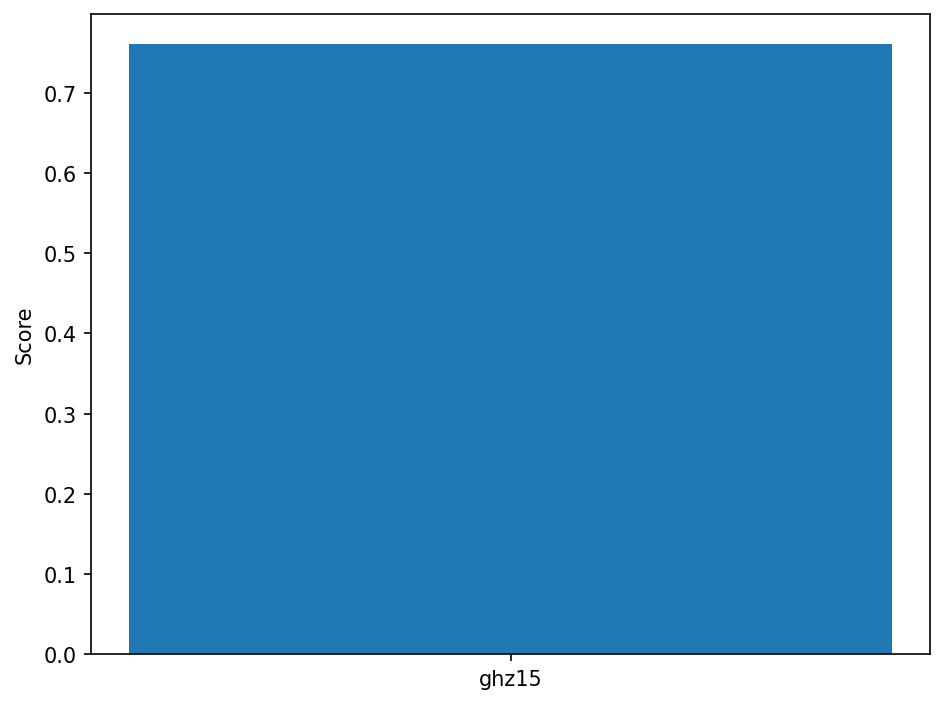

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz3 ; SCORE = 0.8618499736749728


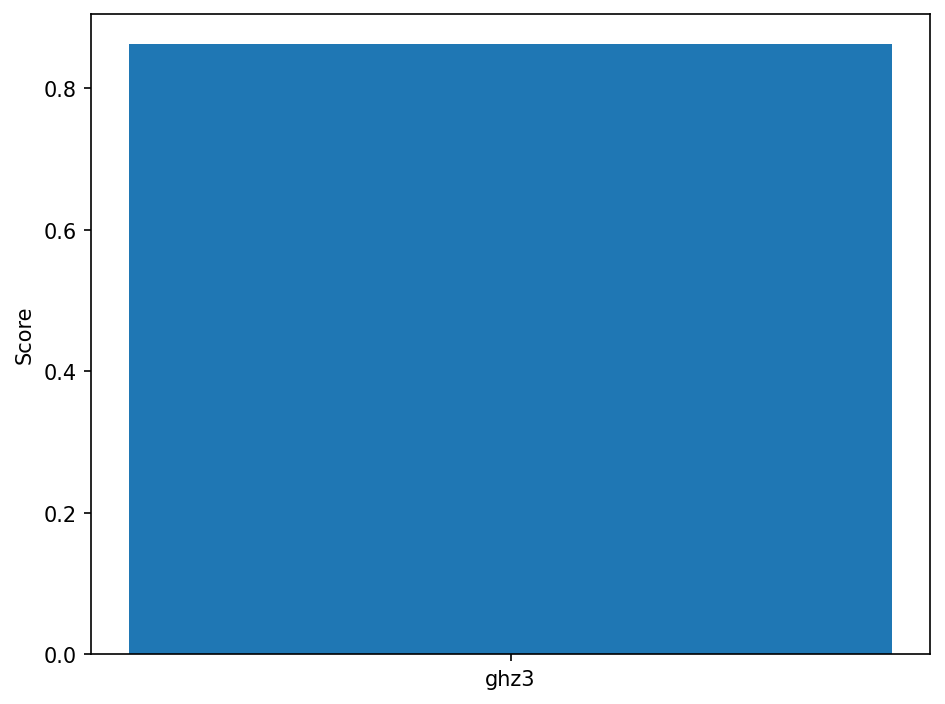

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz5 ; SCORE = 0.7888166663135444


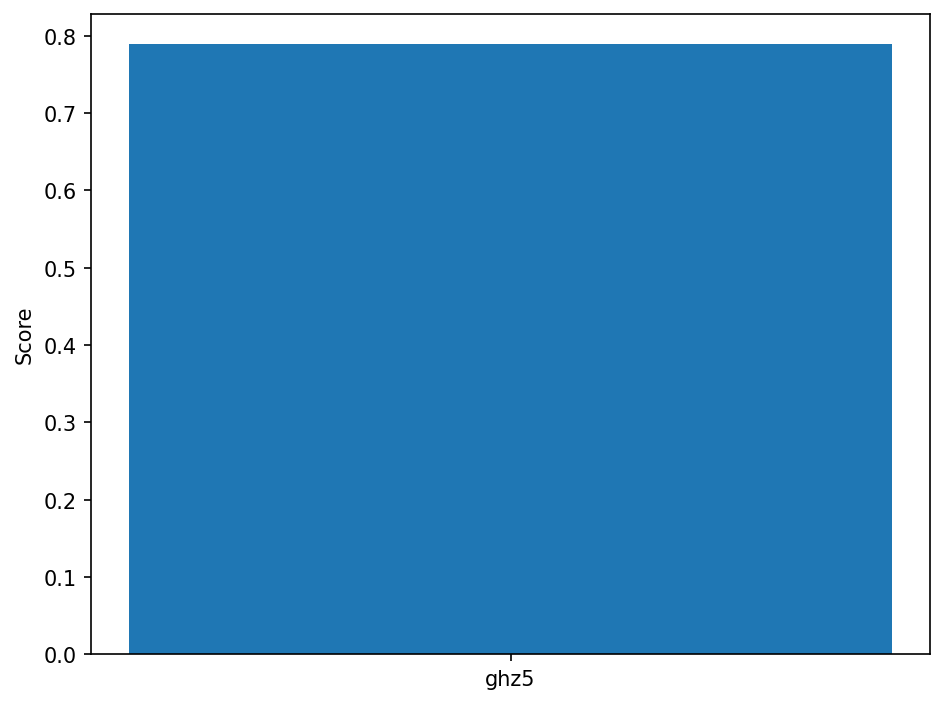

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz7 ; SCORE = 0.7241363060260352


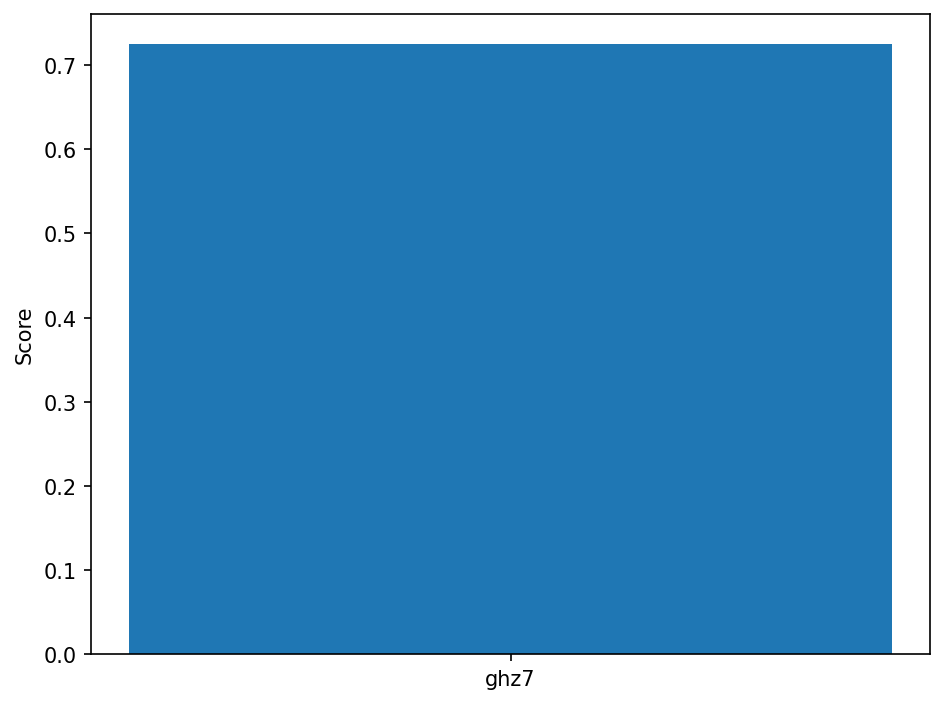

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz9 ; SCORE = 0.6279161203277698


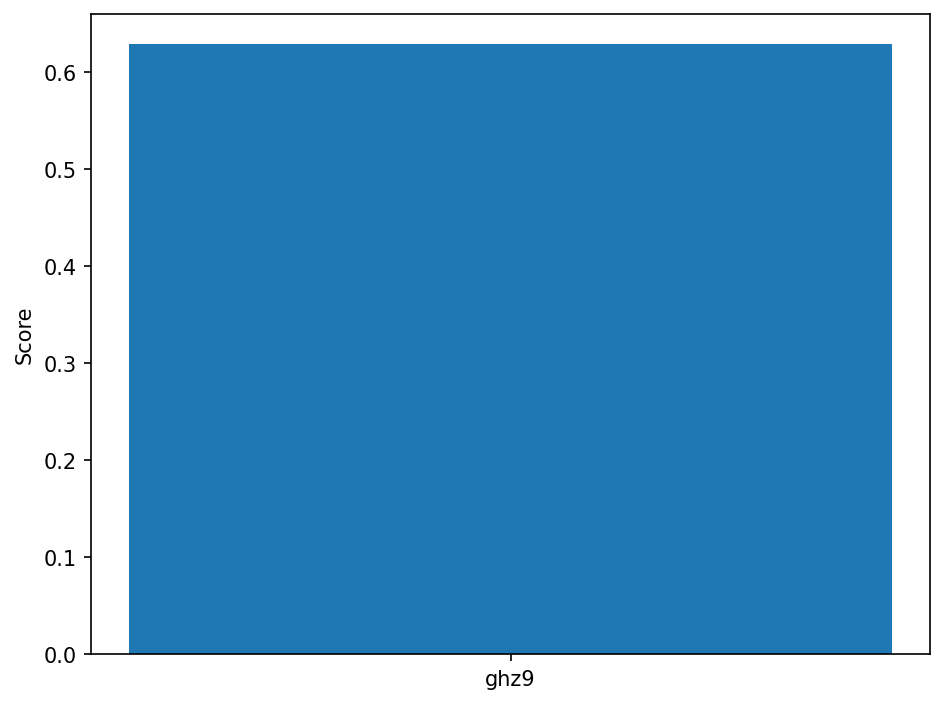

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz11 ; SCORE = 0.5203976836953569


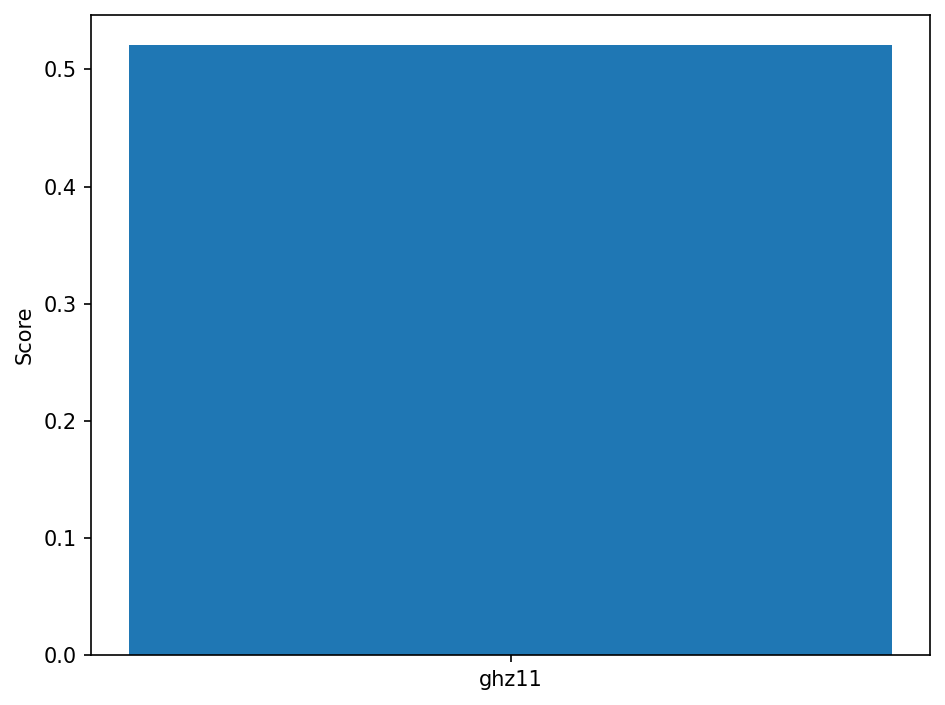

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz13 ; SCORE = 0.47742671256239533


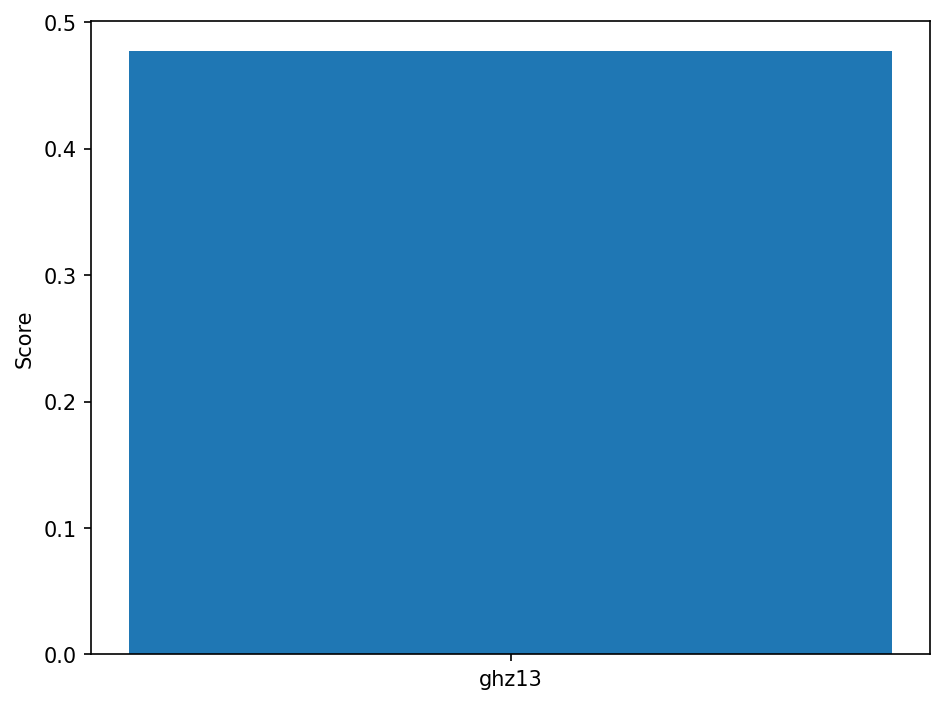

-----------------------------------------------------------
USED BACKEND:: fake_boeblingen ; CIRCUIT_NAME: ghz15 ; SCORE = 0.41535218990567585


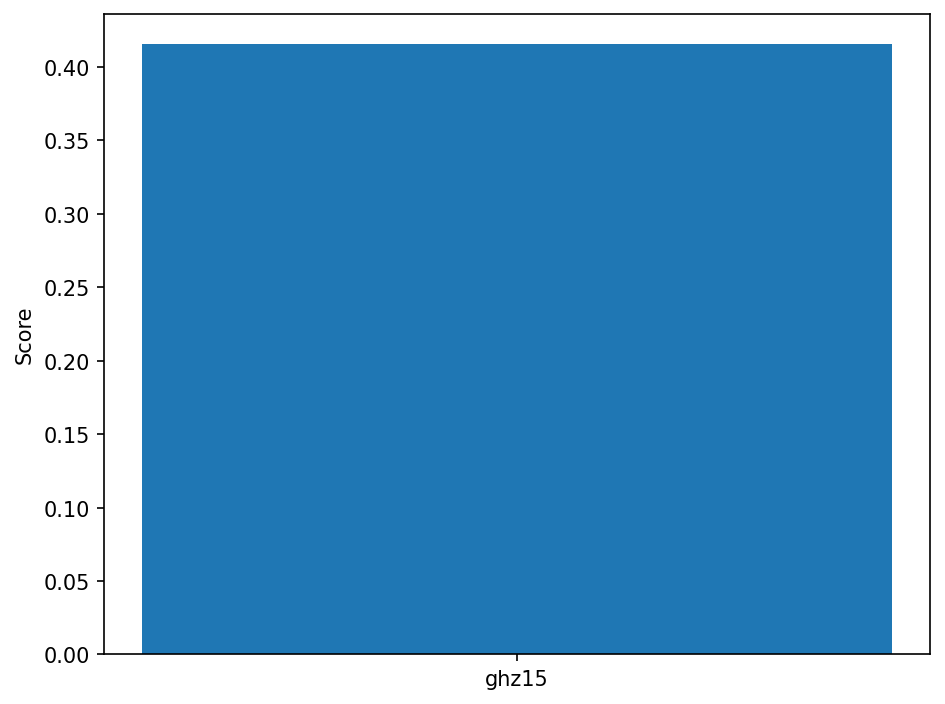

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz3 ; SCORE = 0.9517310164368095


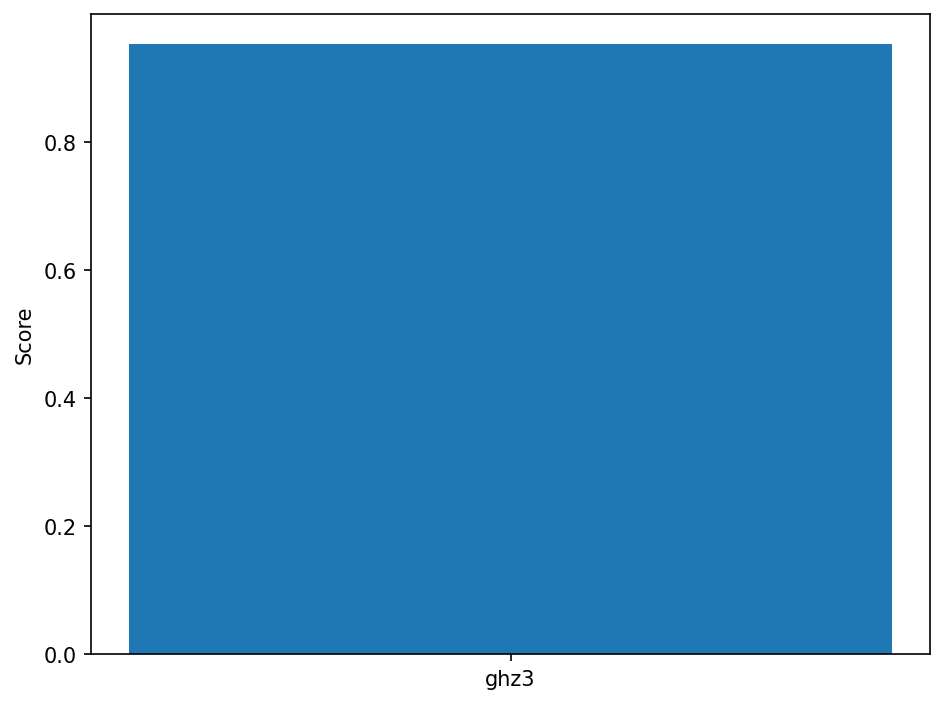

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz5 ; SCORE = 0.7539151098059085


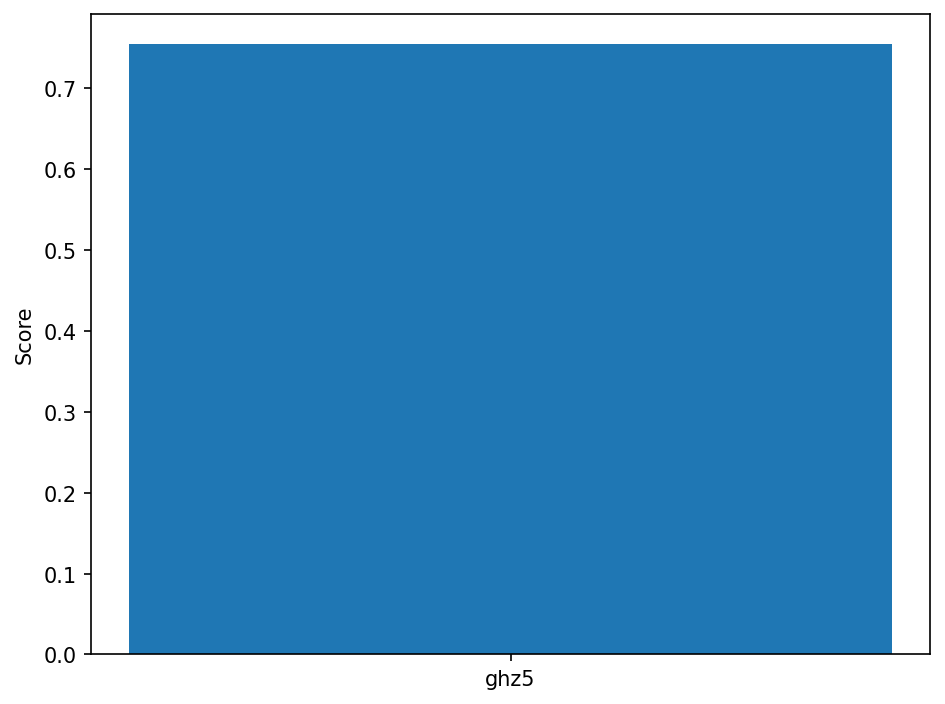

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz7 ; SCORE = 0.6888689881507913


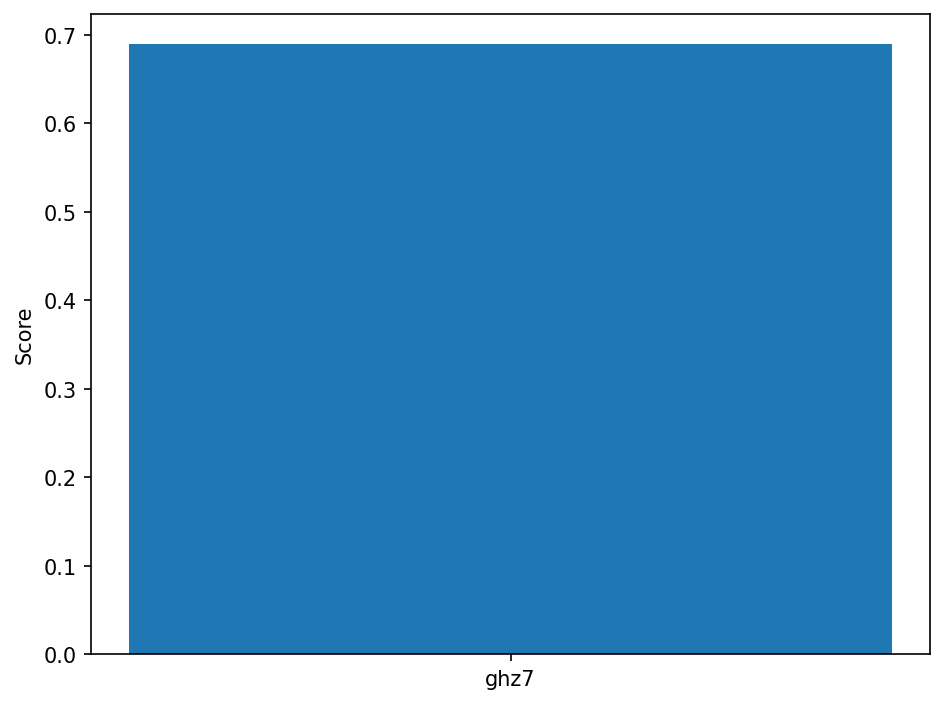

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz9 ; SCORE = 0.6489533864825576


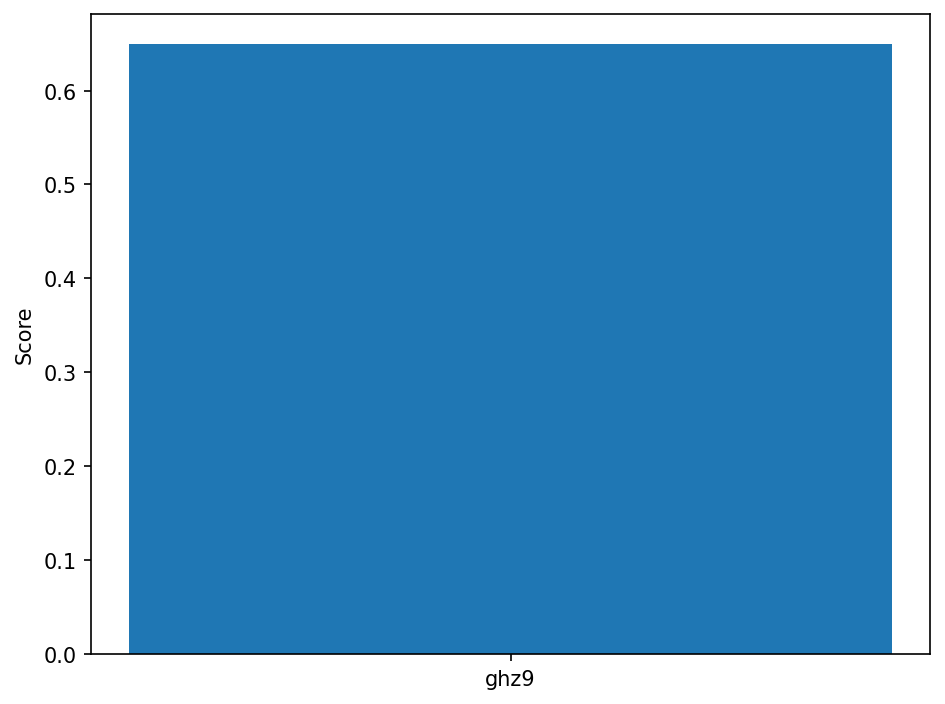

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz11 ; SCORE = 0.12813961030678914


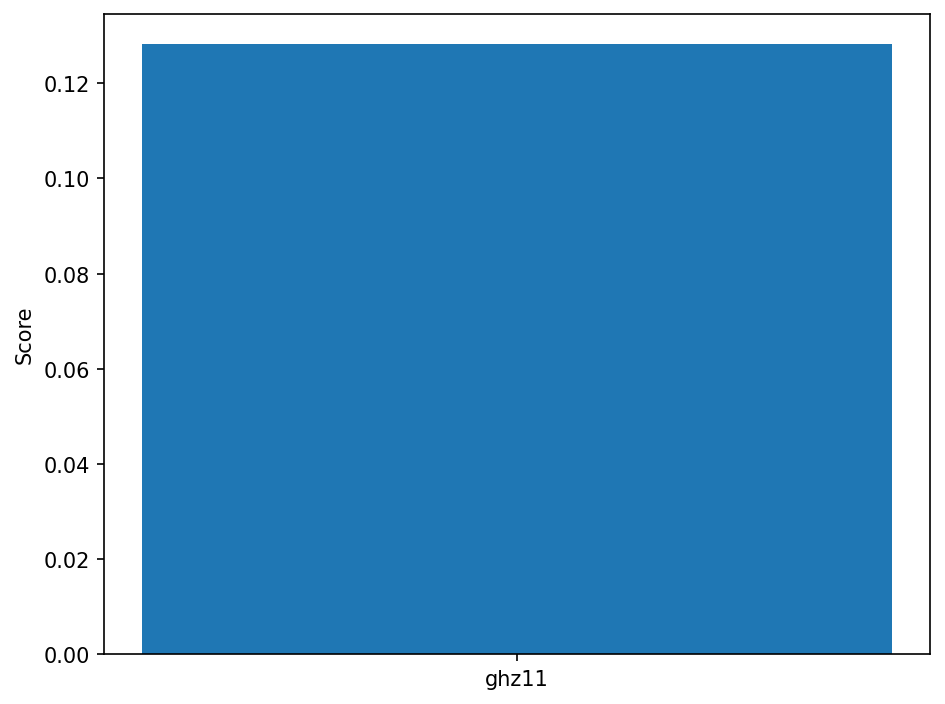

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz13 ; SCORE = 0.06600000000000004


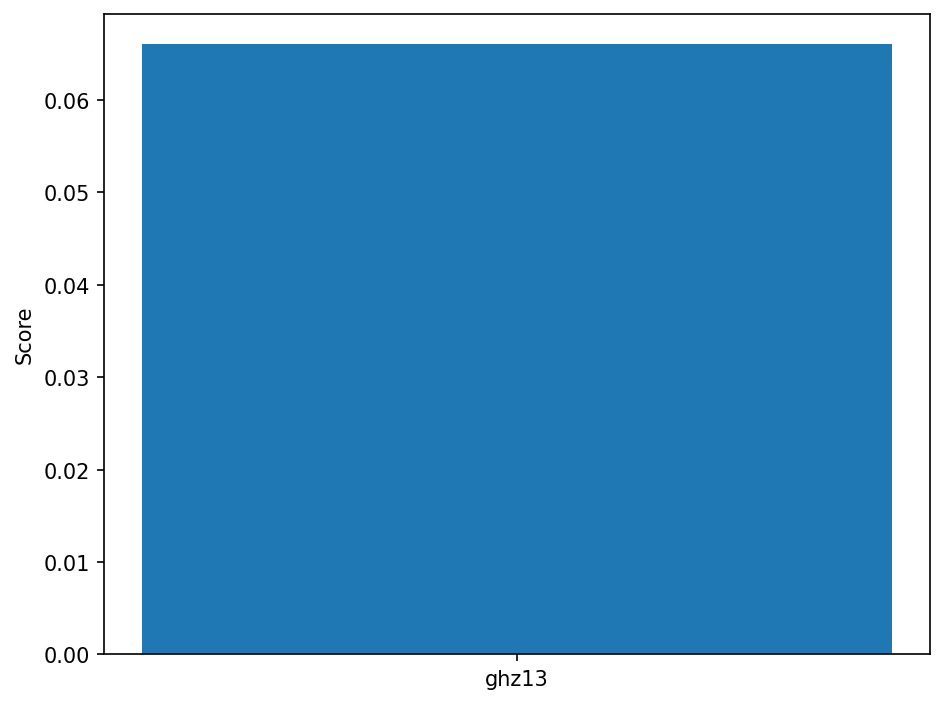

-----------------------------------------------------------
USED BACKEND:: fake_washington ; CIRCUIT_NAME: ghz15 ; SCORE = 0.07598683982644511


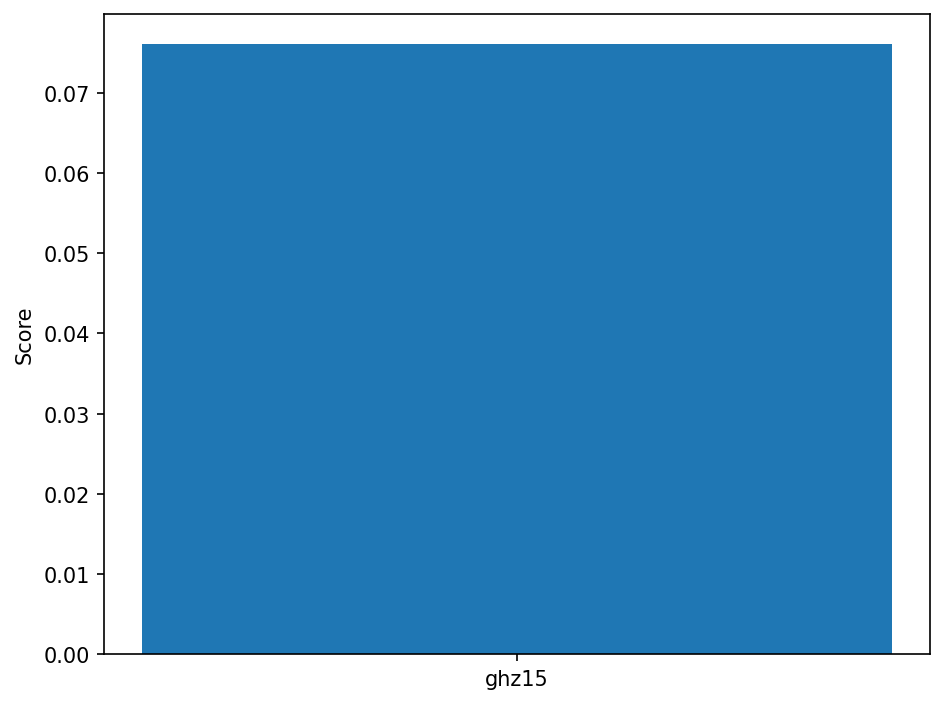

-----------------------------------------------------------


In [10]:
for label,benchmark,backend,job,score in jobs:
    print("USED BACKEND::",backend().name,"; CIRCUIT_NAME:",label, "; SCORE =",score)
    supermarq.plotting.plot_results([score], [label])
    print("-----------------------------------------------------------")

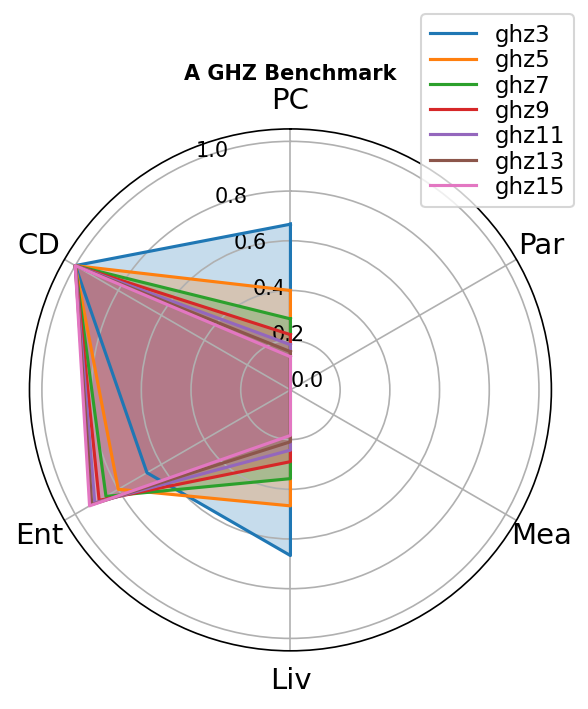

In [60]:
names=[]
scores=[]
for i,j in benchmark_features.items():
    names.append(i)
    scores.append(j)
supermarq.plotting.plot_benchmark(
        ["A GHZ Benchmark",['ghz3', 'ghz5', 'ghz7', 'ghz9', 'ghz11', 'ghz13', 'ghz15'],[[0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], [0.4, 1.0, 0.8, 0.4666666666666667, 0.0, 0], [0.2857142857142857, 1.0, 0.8571428571428571, 0.35714285714285715, 0.0, 0], [0.2222222222222222, 1.0, 0.8888888888888888, 0.28888888888888886, 0.0, 0], [0.18181818181818182, 1.0, 0.9090909090909091, 0.24242424242424243, 0.0, 0], [0.15384615384615385, 1.0, 0.9230769230769231, 0.2087912087912088, 0.0, 0], [0.13333333333333333, 1.0, 0.9333333333333333, 0.18333333333333332, 0.0, 0]]],
        spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
        show=True)

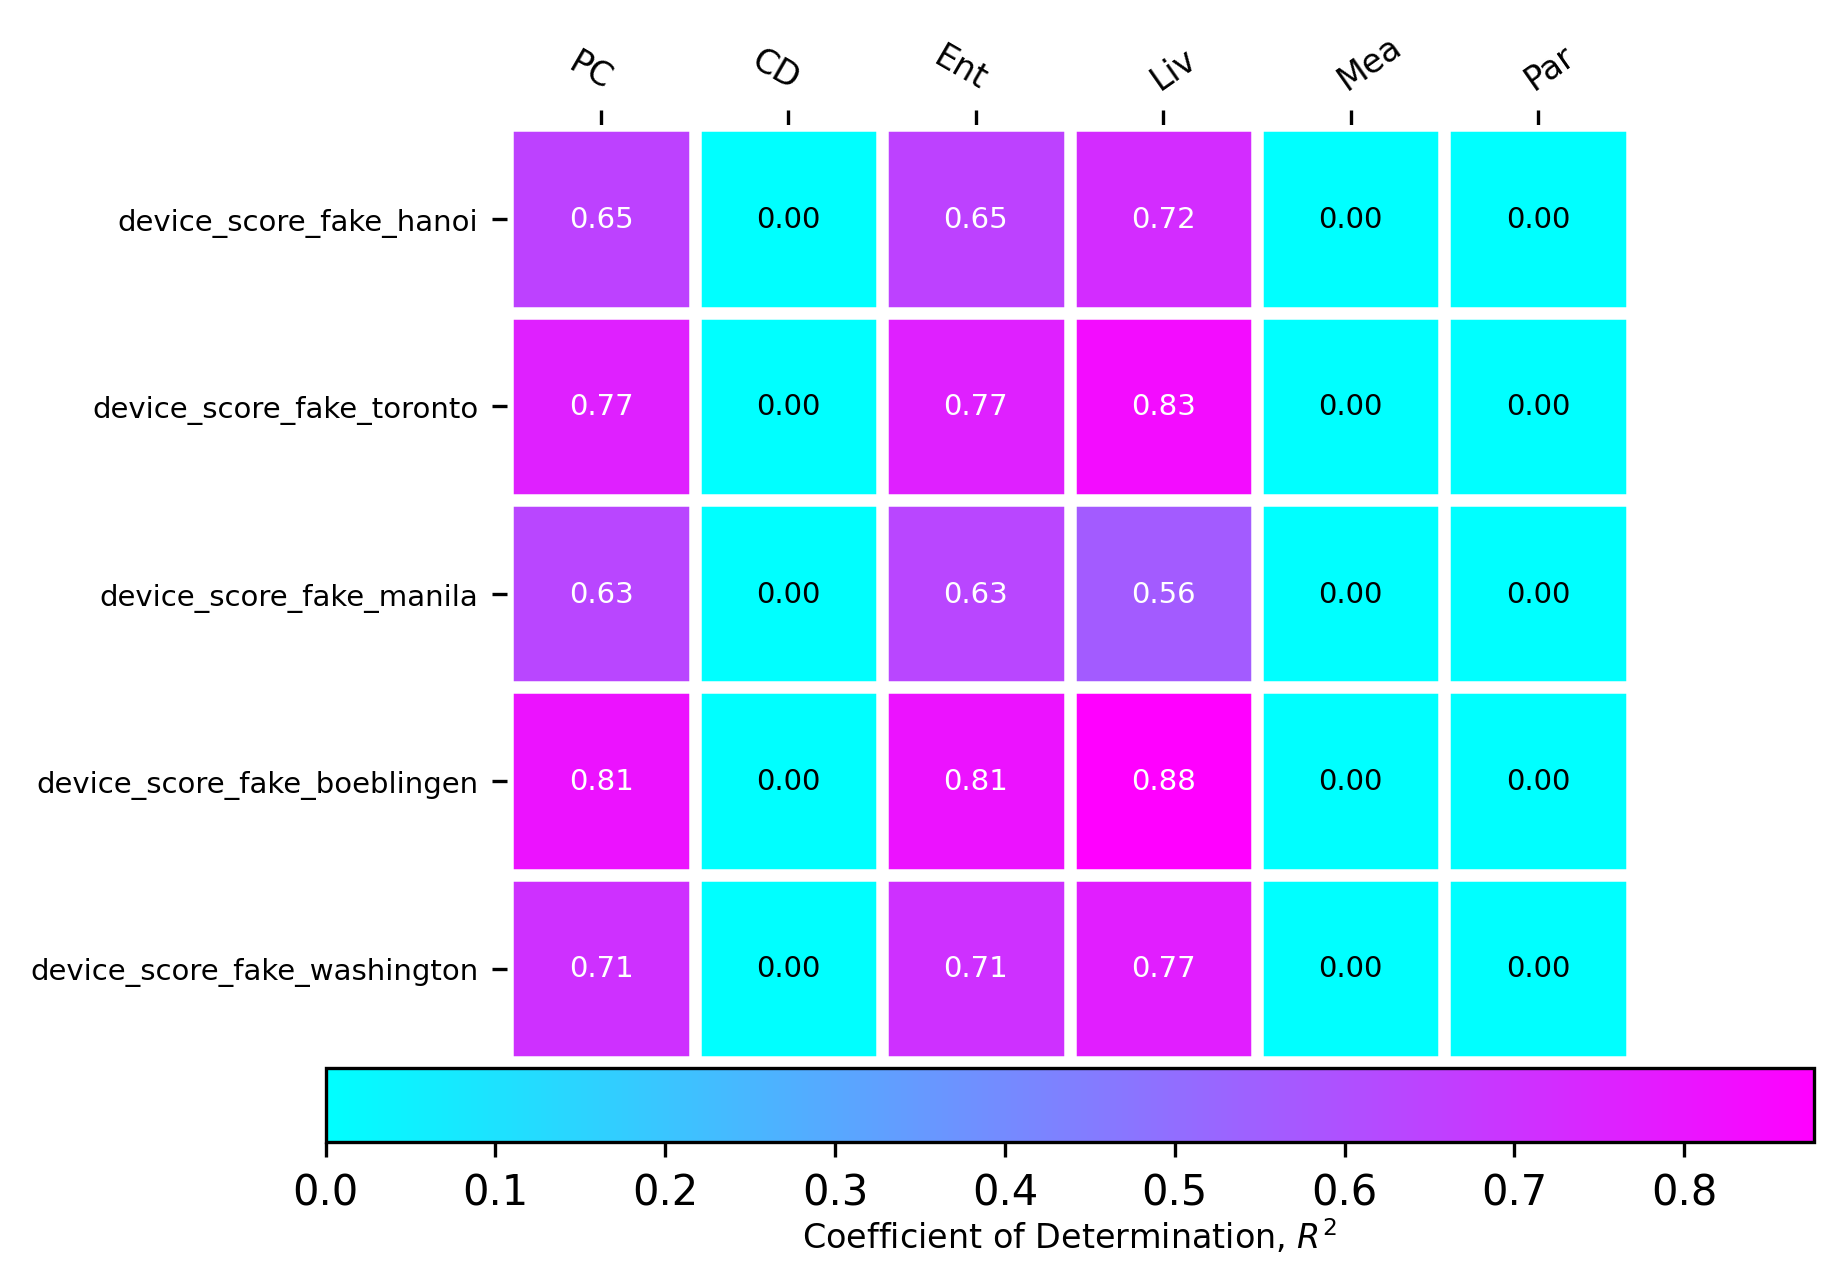

In [61]:
supermarq.plotting.plot_correlations(benchmark_features,all_fake_scores,["PC", "CD", "Ent", "Liv", "Mea", "Par"],device_name=all_fake_names,show=True,)

In [ ]:
def plot_volumetric_results(
    benchmark_data: Iterable[tuple[int, int, float]],
    savefn: str | None = None,
    title: str | None = None,
    show: bool = True,
    xmax: float = 60,
    ymax: float = 7,
    rect_width: float = 1.5,
    rect_height: float = 0.2,
) -> None:
    _, ax = plt.subplots(figsize=[4, 4])

    cmap = matplotlib.colormaps["RdBu"]
    norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label="Benchmark Score")

    for x, y, z in benchmark_data:
        rect = plt.Rectangle(
            (x - rect_width / 2, y - rect_height / 2),
            rect_width,
            rect_height,
            color=cmap(norm(z)),
        )
        ax.add_patch(rect)
    ax.set_xlim(0, xmax)
    ax.set_ylim(0, ymax)
    ax.set_xlabel("Depth")
    ax.set_ylabel("Qubits")
    if title:
        ax.set_title(title)
    if savefn:
        # Don't want to save figures when running tests
        plt.savefig(savefn, bbox_inches="tight")  # pragma: no cover
    if show:
        # Tests will hang if we show figures during tests
        plt.show()  # pragma: no cover
    plt.close()


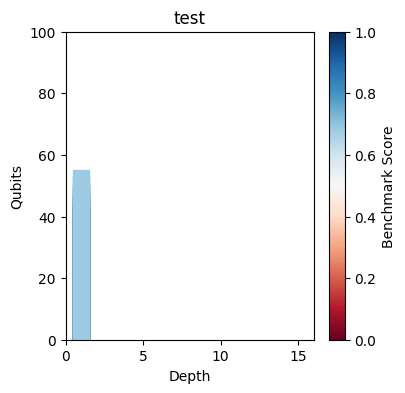

In [81]:
 """Plot the benchmark results on an (x, y) = (depth, qubits) axis.

    It is assumed that all of the given data was collected on a single device. Keyword arguments
    may need to be tweaked depending on the domain and range of benchmark data.

    Args:
        benchmark_data: List of tuples containing (circuit depth, qubits, score) for each benchmark
            executed on a single device.
        savefn: Path to save the plot, if `None`, the plot is not saved.
        title: Optional title for the plot.
        show: Display the plot using `plt.show`.
        xmax: The rightmost limit of the x axis.
        ymax: The uppermost limit of the y axis.
        rect_width: The width of the rectangles.
        rect_height: The height of the rectangles.
    """


supermarq.plotting.plot_volumetric_results(
        [(1.0, 3, 0.9578956044901644,), (1.0, 5,  0.9232678180840281,), (1.0, 7, 0.9039955751995808,),(1.0, 9, 0.8699816088066253,),(1.0, 11,  0.8209119881290019,),(1.0, 13, 0.7484919785236042,),(1.0, 15,0.682999633967593,)],
        ymax=100,
        xmax=16,
        rect_width=1,
        rect_height=80,
        title="test",show=True,)

In [ ]:
supermarq.plotting.heatmap(
    im: matplotlib.image.AxesImage,
    data: npt.NDArray[np.float_] | None = None,
    valfmt: Any = "{x:.2f}",
    textcolors: tuple[str, str] = ("black", "white"),
    threshold: float | None = None,
    **textkw: Any

In [84]:
supermarq.plotting.radar_factory(100)

array([0.        , 0.06283185, 0.12566371, 0.18849556, 0.25132741,
       0.31415927, 0.37699112, 0.43982297, 0.50265482, 0.56548668,
       0.62831853, 0.69115038, 0.75398224, 0.81681409, 0.87964594,
       0.9424778 , 1.00530965, 1.0681415 , 1.13097336, 1.19380521,
       1.25663706, 1.31946891, 1.38230077, 1.44513262, 1.50796447,
       1.57079633, 1.63362818, 1.69646003, 1.75929189, 1.82212374,
       1.88495559, 1.94778745, 2.0106193 , 2.07345115, 2.136283  ,
       2.19911486, 2.26194671, 2.32477856, 2.38761042, 2.45044227,
       2.51327412, 2.57610598, 2.63893783, 2.70176968, 2.76460154,
       2.82743339, 2.89026524, 2.95309709, 3.01592895, 3.0787608 ,
       3.14159265, 3.20442451, 3.26725636, 3.33008821, 3.39292007,
       3.45575192, 3.51858377, 3.58141563, 3.64424748, 3.70707933,
       3.76991118, 3.83274304, 3.89557489, 3.95840674, 4.0212386 ,
       4.08407045, 4.1469023 , 4.20973416, 4.27256601, 4.33539786,
       4.39822972, 4.46106157, 4.52389342, 4.58672527, 4.64955